In [1]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import normaltest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

Download Housing Data from GitHub
Store Housing Data as 'YingshiHuang_RunjiaShe_final_project.csv'

In [2]:
url = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
r = requests.get(url, allow_redirects=True)
open('YingshiHuang_RunjiaShe_final_project.csv', 'wb').write(r.content)
df = pd.read_csv('YingshiHuang_RunjiaShe_final_project.csv')

# METHOD 1

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Factors might affect the SalePrice
YrdSold, YearBuilt, LotArea

In [4]:
df['YearUsed'] = df['YrSold'] - df['YearBuilt']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearUsed
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,8


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(2919, 82)

In [7]:
df1 = pd.DataFrame(columns = ['Street','SalePrice','LotArea','YearUsed'], data = df)
df1

,Street,SalePrice,LotArea,YearUsed
0,Pave,208500.0,8450,5
1,Pave,181500.0,9600,31
2,Pave,223500.0,11250,7
3,Pave,140000.0,9550,91
4,Pave,250000.0,14260,8
...,...,...,...,...
2914,Pave,NaN,1936,36
2915,Pave,NaN,1894,36
2916,Pave,NaN,20000,46
2917,Pave,NaN,10441,14


In [8]:
df1 = df1.dropna(how='any',axis=0)
df1

,Street,SalePrice,LotArea,YearUsed
0,Pave,208500.0,8450,5
1,Pave,181500.0,9600,31
2,Pave,223500.0,11250,7
3,Pave,140000.0,9550,91
4,Pave,250000.0,14260,8
...,...,...,...,...
1455,Pave,175000.0,7917,8
1456,Pave,210000.0,13175,32
1457,Pave,266500.0,9042,69
1458,Pave,142125.0,9717,60


In [9]:
df1.groupby('Street').describe()

SalePrice                                                            \
           count           mean           std      min       25%       50%   
Street                                                                       
Grvl         6.0  130190.500000  65446.253991  55993.0   88250.0  114250.0   
Pave      1454.0  181130.538514  79446.597317  34900.0  130000.0  163000.0   

                           LotArea                ...                      \
             75%       max   count          mean  ...       75%       max   
Street                                            ...                       
Grvl    169650.0  228950.0     6.0  41136.333333  ...  30849.75  164660.0   
Pave    214000.0  755000.0  1454.0  10390.475241  ...  11596.00  215245.0   

       YearUsed                                                         
          count       mean        std   min    25%   50%    75%    max  
Street                                                                  
Grvl        6.0  47.000000  18.558017  17.0  43.25  45.5  55.25   73.0  
Pave     1454.0  36.504814  30.285513   0.0   7.25  35.0  54.00  136.0  

[2 rows x 24 columns]

Choose the midian 50% data, to avoid extreme conditions

In [10]:
df1_Pave = df1.loc[df1['Street'] == 'Pave']
df1_Pave = df1_Pave.loc[df1_Pave['LotArea'] < 11596]
df1_Pave = df1_Pave.loc[df1_Pave['LotArea'] > 7536.25]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] < 54]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] > 35]

In [11]:
df1_Pave

,Street,SalePrice,LotArea,YearUsed
7,Pave,200000.0,10382,36
10,Pave,129500.0,11200,43
14,Pave,157000.0,10920,48
16,Pave,149000.0,11241,40
17,Pave,90000.0,10791,39
...,...,...,...,...
1425,Pave,142000.0,10721,49
1435,Pave,174000.0,8400,46
1436,Pave,120500.0,9000,36
1445,Pave,129000.0,8400,41


In [12]:
normaltest(df1_Pave['SalePrice'])

NormaltestResult(statistic=26.652311584400945, pvalue=1.6312633333617312e-06)

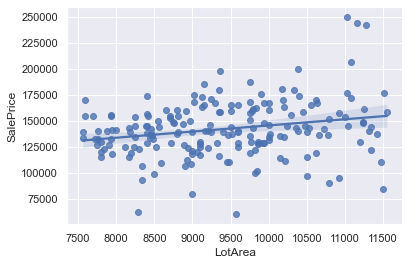

In [13]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.regplot(x='LotArea', y='SalePrice', data=df1_Pave, color='b',order=1.5)
plt.show()

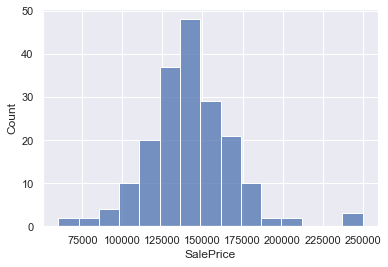

In [14]:
Saleplot = sns.histplot(df1_Pave['SalePrice'], kde = False, bins=15)

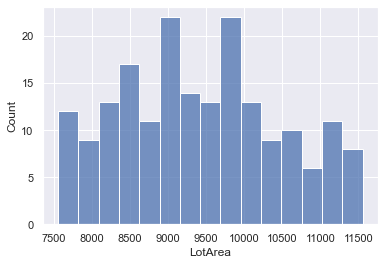

In [15]:
Areaplot = sns.histplot(df1_Pave['LotArea'], kde = False, bins=15)

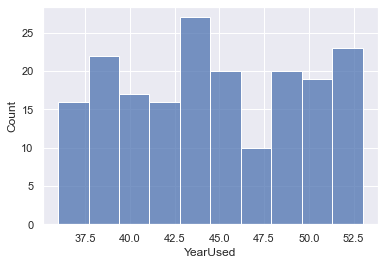

In [16]:
Yearplot = sns.histplot(df1_Pave['YearUsed'], kde = False, bins=10)

In [17]:
X = np.array(df1_Pave['YearUsed']).reshape(-1, 1)
y = np.array(df1_Pave['SalePrice']).reshape(-1, 1)
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

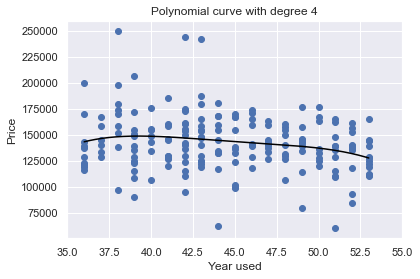

In [18]:
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial curve with degree "+str(degree))
plt.xlabel('Year used')
plt.ylabel('Price')
plt.xlim(35,55)
plt.show()

# METHOD 2
Drop off the NULL values

In [19]:
df2_year_built = df[['YearBuilt', 'SalePrice']].dropna()

Set Year Built as independent values
Set SalePrice as dependent values

In [20]:
x_value = df2_year_built['YearBuilt']
y_value = df2_year_built['SalePrice']

Scatter Plot as blue spots
Save figure as 'YearBuilt_SalePrice_scatter.png'

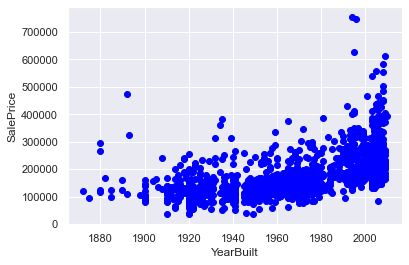

In [21]:
plt.figure()
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
new_name = 'YearBuilt_SalePrice_scatter_original'
plt.savefig(new_name + '.png', bbox_inches='tight')

According to the shape of scatter pointers
It is closer to Polynomial Regression Curve fit rather than Linear Regression

In [22]:
df2_year_built.describe()

,YearBuilt,SalePrice
count,1460.000000,1460.000000
mean,1971.267808,180921.195890
std,30.202904,79442.502883
min,1872.000000,34900.000000
25%,1954.000000,129975.000000
50%,1973.000000,163000.000000
75%,2000.000000,214000.000000
max,2010.000000,755000.000000


min is the oldest house YearBuilt = 1872
max is the newest house YearBuilt = 2010

numpy.polyfit (X, Y, deg, rcond=None, full=False, w=None, cov=False)
Return Value
It returns a ndarray, shape (deg+1,) or (deg+1, K)
deg: int,
It should be an integer value and specify the degree to which polynomial should be made fit.
rcond: float,
full: It’s an optional parameter of Boolean type,
w: array_like, shape(M,), optional,
cov: bool or str, optional parameter,
y = a0 + a1x + a2x^2 + … + anx^n
calculating value of coefficient in case of cubic polynomial
numpy.polyfit = a0 + a1x + a2x^2 + a3x^3

In [23]:
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)

In [24]:
polynomial_degree_3

array([ 8.92851052e-02, -5.01672131e+02,  9.38656738e+05, -5.84675974e+08])

np.poly1d([1, 2, 3])
1 * x_to_2 + 2 * x_to_1 + 3 * x_to_0
Construct the polynomial:
 p = np.poly1d([1, 2, 3])
 print(np.poly1d(p))
Evaluate the polynomial at:
 p(0.5)
 =1 * 0.25 + 2 * 0.5 + 3 * 1
 4.25

In [25]:
polynomial_degree_3_model = np.poly1d(polynomial_degree_3)

numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)
-> start  : [optional] start of interval range. By default start = 0
-> stop   : end of interval range
-> restep : If True, return (samples, step). By deflut restep = False
-> num    : [int, optional] No. of samples to generate
-> dtype  : type of output array

start = the oldest 1872
end = the newest 2010
num = end - start = 138

In [26]:
polynomial_degree_3_line = np.linspace(1872, 2010, num=138)

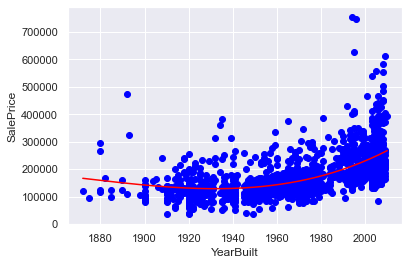

In [27]:
plt.figure()
plt.scatter(x_value, y_value, color='blue')
plt.plot(polynomial_degree_3_line, polynomial_degree_3_model(polynomial_degree_3_line), color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
new_name = 'YearBuilt_SalePrice_scatter_polynomial_3'
plt.savefig(new_name + '.png', bbox_inches='tight')

Remove outliers with maximum 2 standard deviation
reject_outliers(data, m=2)

In [28]:
def reject_outliers(data, m=2):
    return pd.DataFrame(data[abs(data - np.mean(data)) < m * np.std(data)])

In [29]:
df2_no_outliers = reject_outliers(df2_year_built)

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [30]:
df2_drop_na = df2_no_outliers[~(np.isnan(df2_no_outliers).any(axis=1))]

In [31]:
df2_drop_na.describe()

,YearBuilt,SalePrice
count,1351.000000,1351.000000
mean,1972.433753,171279.890452
std,27.423642,58665.469121
min,1911.000000,34900.000000
25%,1955.000000,130000.000000
50%,1972.000000,160000.000000
75%,2000.000000,205000.000000
max,2009.000000,339750.000000


In [32]:
x_value = df2_drop_na['YearBuilt']
y_value = df2_drop_na['SalePrice']

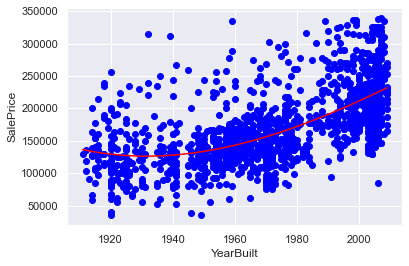

In [33]:
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)
polynomial_degree_3_nooutliers_model = np.poly1d(polynomial_degree_3)
polynomial_degree_3_nooutliers_line = np.linspace(1911, 2009, num=98)
plt.scatter(x_value, y_value, color='blue')
plt.plot(polynomial_degree_3_nooutliers_line, polynomial_degree_3_nooutliers_model(polynomial_degree_3_nooutliers_line), color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
new_name = 'YearBuilt_SalePrice_scatter_polynomial_3_remove_outliers'
plt.savefig(new_name + '.png', bbox_inches='tight')

The shape of the housing data without outliers is also seem to fit by using linear regression

values converts it into a numpy array
-1 means that calculate the dimension of rows, but have 1 column
create object for the class
perform linear regression
make predictions from the x_value so that it is ordered
x_value do not need to be changing, because it is independent

In [34]:
x_value = df2_drop_na.iloc[:, 0].values.reshape(-1, 1)
y_value = df2_drop_na.iloc[:, 1].values.reshape(-1, 1)

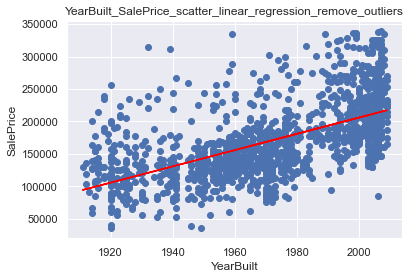

In [35]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_value, y_value)
Y_predict = linear_regressor.predict(x_value)
plt.figure()
plt.scatter(x_value, y_value)
plt.plot(x_value, Y_predict, color='red')
plt.title('YearBuilt_SalePrice_scatter_linear_regression_remove_outliers')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
new_name = 'YearBuilt_SalePrice_scatter_linear_regression_remove_outliers'
plt.savefig(new_name + '.png', bbox_inches='tight')

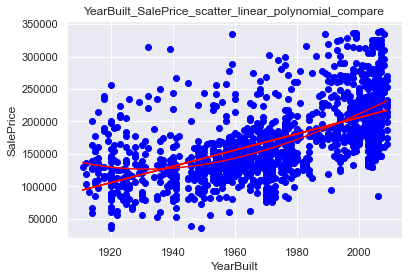

In [36]:
plt.scatter(x_value, y_value, color='blue')
plt.plot(polynomial_degree_3_nooutliers_line, polynomial_degree_3_nooutliers_model(polynomial_degree_3_nooutliers_line), color='red')
plt.plot(x_value, Y_predict, color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt_SalePrice_scatter_linear_polynomial_compare')
new_name = 'YearBuilt_SalePrice_scatter_linear_polynomial_compare'
plt.savefig(new_name + '.png', bbox_inches='tight')

x_value and y_value have to update, because the N/A cells are different every time data reorganize

In [37]:
df2_lot_area = df[['LotArea', 'SalePrice']].dropna()

In [38]:
x_value = df2_lot_area['LotArea']
y_value = df2_lot_area['SalePrice']

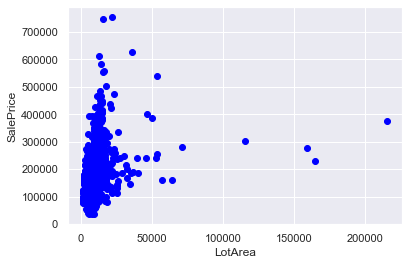

In [39]:
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
new_name = 'LotArea_SalePrice'
plt.savefig(new_name + '.png', bbox_inches='tight')

According to the shape of scatter pointers
It is closer to linear regression

In [40]:
df2_lot_area = reject_outliers(df2_lot_area)
df2_lot_area_no_outliers = df2_lot_area[~(np.isnan(df2_lot_area).any(axis=1))]

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [41]:
df2_lot_area_no_outliers.describe()

,LotArea,SalePrice
count,1380.000000,1380.000000
mean,9503.316667,169424.794928
std,3841.799392,58843.413729
min,1300.000000,34900.000000
25%,7406.750000,128500.000000
50%,9249.000000,158250.000000
75%,11242.750000,202500.000000
max,29959.000000,339750.000000


In [42]:
x_value = df2_lot_area_no_outliers['LotArea']
y_value = df2_lot_area_no_outliers['SalePrice']

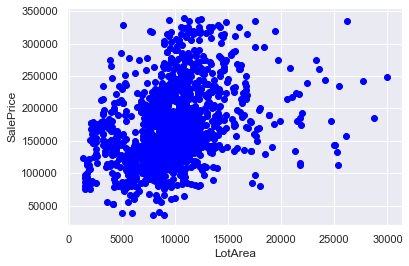

In [43]:
plt.figure()
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
new_name = 'LotArea_SalePrice_remove_outliers'
plt.savefig(new_name + '.png', bbox_inches='tight')

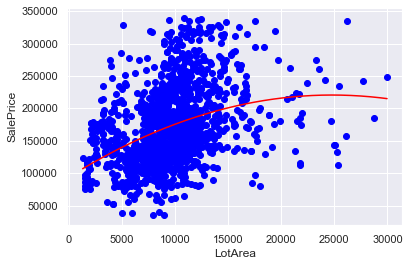

In [44]:
polynomial_degree_2 = np.polyfit(x_value, y_value,2)
polynomial_degree_2_model = np.poly1d(polynomial_degree_2)
polynomial_degree_2_line = np.linspace(1300, 29959, num=28659)
plt.figure()
plt.scatter(x_value, y_value, color='blue')
plt.plot(polynomial_degree_2_line, polynomial_degree_2_model(polynomial_degree_2_line), color='red')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
new_name = 'LotArea_SalePrice_scatter_polynomial_2_remove_outliers'
plt.savefig(new_name + '.png', bbox_inches='tight')

In [45]:
x_value = df2_lot_area_no_outliers.iloc[:, 0].values.reshape(-1, 1)
y_value = df2_lot_area_no_outliers.iloc[:, 1].values.reshape(-1, 1)

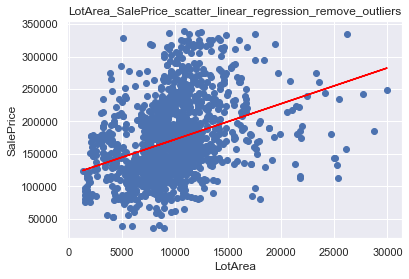

In [46]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_value, y_value)
Y_predict = linear_regressor.predict(x_value)
plt.figure()
plt.scatter(x_value, y_value)
plt.plot(x_value, Y_predict, color='red')
plt.title('LotArea_SalePrice_scatter_linear_regression_remove_outliers')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
new_name = 'LotArea_SalePrice_scatter_linear_regression_remove_outliers'
plt.savefig(new_name + '.png', bbox_inches='tight')

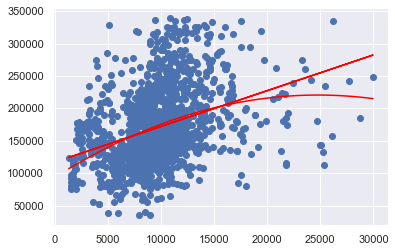

In [47]:
plt.figure()
plt.scatter(x_value, y_value)
plt.plot(x_value, Y_predict, color='red')
plt.plot(polynomial_degree_2_line, polynomial_degree_2_model(polynomial_degree_2_line), color='red')
new_name = 'LotArea_SalePrice_Linear_Polynomial'
plt.savefig(new_name + '.png', bbox_inches='tight')

# Get all the factors data which might affect the Sale price

In [48]:
df_dropna = df[['LotArea', 'LotShape', 'OverallCond', 'YearBuilt', 'Foundation', 'Electrical', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageCars', 'GarageArea', 'YrSold', 'SaleCondition', 'YearUsed', 'SalePrice']].dropna()

# Get the correlation of how every factors correlative with each other.

In [49]:
df_cor = df_dropna.corr()

# In practical, only correlation absolute value is higher than 0.4 have high influence.

In [50]:
df_cor[(df_cor < 0.4) & (df_cor > -0.4)] = np.NAN

Only observe the row of Sale Price, ignore all the correlation absolute value lower than 0.4

In [51]:
high_cor = df_cor.loc['SalePrice'].dropna().drop('SalePrice')

Convert the all value into absolute but in separate name

In [52]:
abs_high_cor = abs(high_cor)

# Plot all the factors as X, and all the response correlation as Y

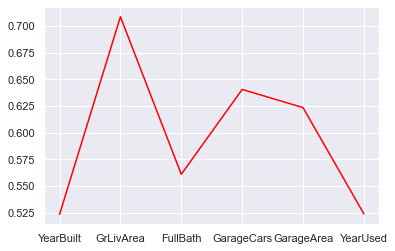

In [53]:
plt.figure()
plt.plot(abs_high_cor, color='red')
new_name = 'high_cor_hist_plot'
plt.savefig(new_name + '.png', bbox_inches='tight')

Get the current path, and clean all the .png and .csv. Therefore the folder is clean.

In [54]:
cwd = os.getcwd()

In [55]:
for file in os.listdir(cwd):
    if file.endswith('.png'):
        os.remove(file)
    if file.endswith('.csv'):
        os.remove(file)